In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn

In [4]:
df=pd.read_csv('Loan_Application_Status.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.shape

(614, 13)

Here we can see that there are 614 rows and 13 columns in this dataset.

In [6]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

There are 3 types of data in this dataset which are object, float and integer.

In [7]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Checked all the columns in the dataset.

In [8]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Checking for null values in the dataset.

In [9]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


This gives the statistical summary about the dataset.

## Exploratory Data Analysis

### Univariate Analysis

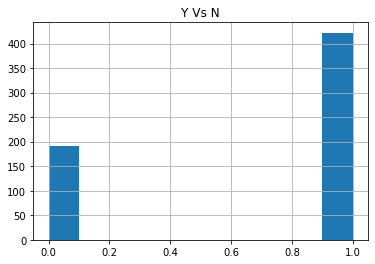

In [42]:
df["Loan_Status"].hist(grid=True)
plt.title("Y Vs N")
plt.show()

Data Imbalnce exist in the dataset.

In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [13]:
for column in df.columns:
    df[column]=le.fit_transform(df[column])

Converted all the strings to numerical.

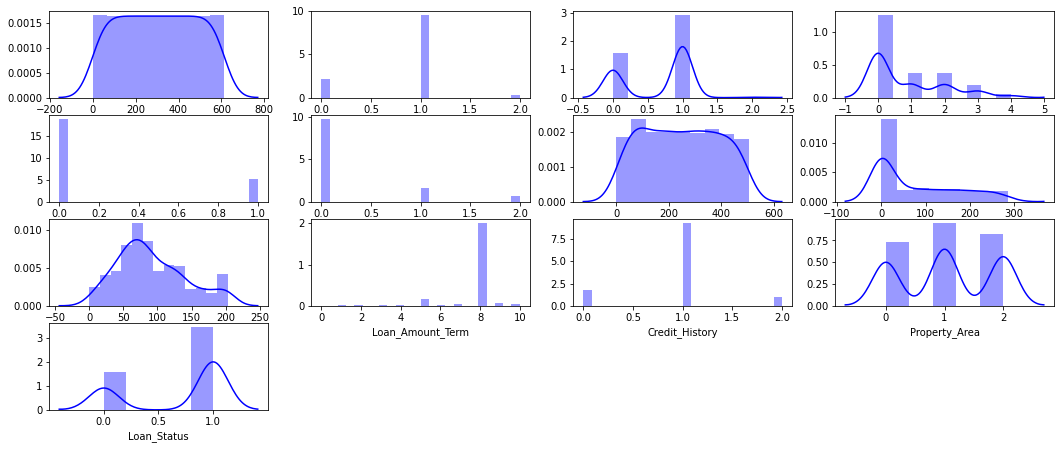

In [15]:
plt.figure(figsize=(18,15))
for i in enumerate(df.columns):
    plt.subplot(8,4,i[0]+1)
    sns.distplot(df[i[1]],color='b')

From this we can see that only 3 columns are normaly distributed other columns are left or right skewed

### Bivariate Analysis

In [16]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

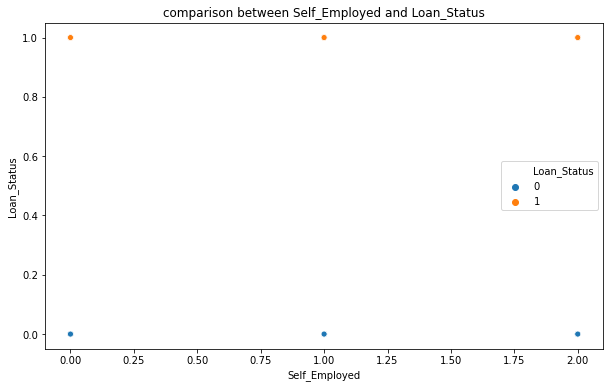

In [18]:
plt.figure(figsize=[10,6])
plt.title("comparison between Self_Employed and Loan_Status")
sns.scatterplot(df['Self_Employed'],df['Loan_Status'],hue=df["Loan_Status"])

This shows the distribution of self employed against loan status.

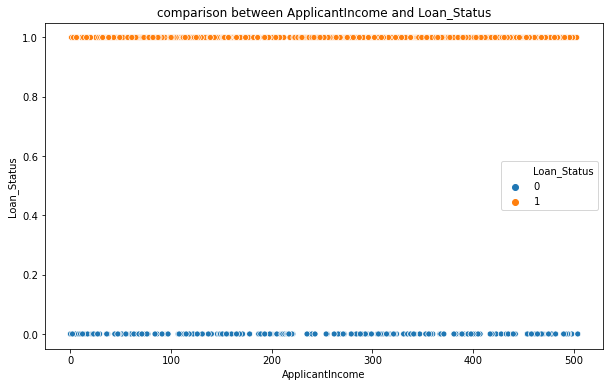

In [20]:
plt.figure(figsize=[10,6])
plt.title("comparison between ApplicantIncome and Loan_Status")
sns.scatterplot(df['ApplicantIncome'],df['Loan_Status'],hue=df["Loan_Status"])

This shows the distribution of applicant income against loan status.

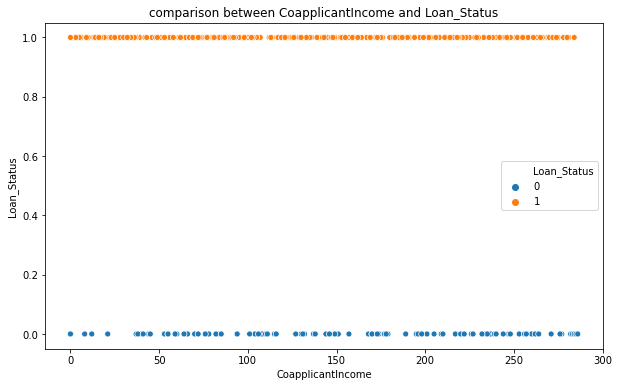

In [22]:
plt.figure(figsize=[10,6])
plt.title("comparison between CoapplicantIncome and Loan_Status")
sns.scatterplot(df['CoapplicantIncome'],df['Loan_Status'],hue=df["Loan_Status"])

This shows the distribution of co-applicantincome against loan status.

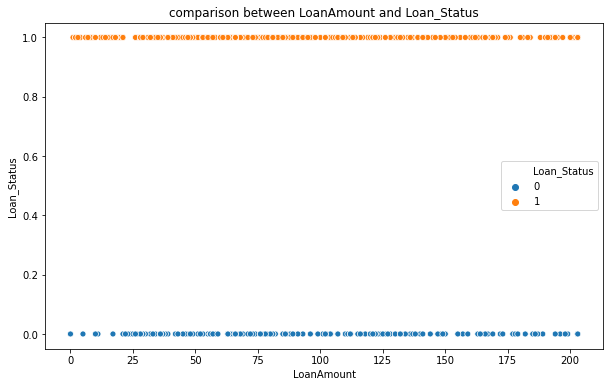

In [24]:
plt.figure(figsize=[10,6])
plt.title("comparison between LoanAmount and Loan_Status")
sns.scatterplot(df['LoanAmount'],df['Loan_Status'],hue=df["Loan_Status"])

This shows the distribution of loanamount against loan status.

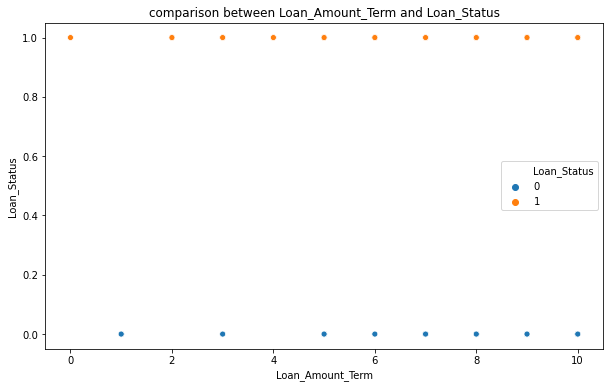

In [25]:
plt.figure(figsize=[10,6])
plt.title("comparison between Loan_Amount_Term and Loan_Status")
sns.scatterplot(df['Loan_Amount_Term'],df['Loan_Status'],hue=df["Loan_Status"])

This shows the distribution of loan amount term against loan status.

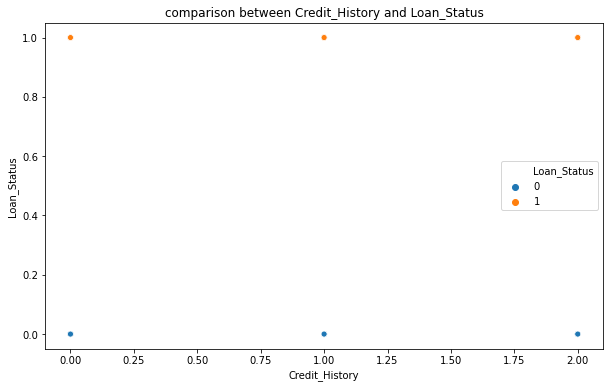

In [28]:
plt.figure(figsize=[10,6])
plt.title("comparison between Credit_History and Loan_Status")
sns.scatterplot(df['Credit_History'],df['Loan_Status'],hue=df["Loan_Status"])

This shows the distribution of credit history against loan status.

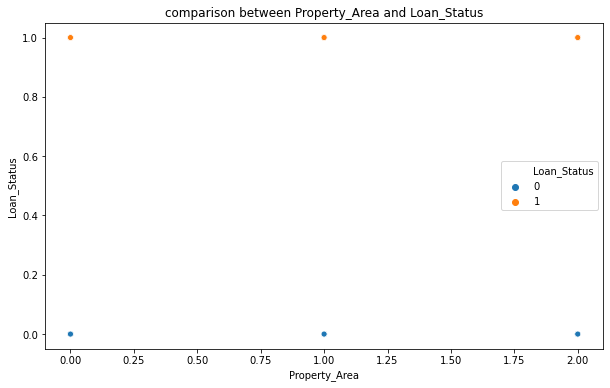

In [30]:
plt.figure(figsize=[10,6])
plt.title("comparison between Property_Area and Loan_Status")
sns.scatterplot(df['Property_Area'],df['Loan_Status'],hue=df["Loan_Status"])

This shows the distribution of property area against loan status.

In [31]:
corr=df.corr()
corr

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.000000,-0.007403,-0.018621,0.055139,0.039442,0.005039,0.008771,-0.030368,0.018645,-0.060161,-0.015365,-0.155416,0.011773
Gender,-0.007403,1.000000,0.336094,0.149674,0.024382,-0.025022,0.075981,0.167229,0.152121,-0.061180,-0.018755,-0.030903,0.008690
Married,-0.018621,0.336094,1.000000,0.338689,0.006759,-0.038153,0.017005,0.196097,0.178581,-0.078732,0.033224,0.007973,0.096657
Dependents,0.055139,0.149674,0.338689,1.000000,0.060466,0.005622,0.144363,-0.077131,0.141360,-0.082453,-0.089960,0.032600,-0.007318
Education,0.039442,0.024382,0.006759,0.060466,1.000000,-0.021130,-0.190873,-0.052724,-0.137432,-0.052948,-0.037534,-0.065243,-0.085884
Self_Employed,0.005039,-0.025022,-0.038153,0.005622,-0.021130,1.000000,0.101675,-0.011169,0.071473,-0.021398,0.092270,-0.013439,0.010880
ApplicantIncome,0.008771,0.075981,0.017005,0.144363,-0.190873,0.101675,1.000000,-0.248763,0.473715,-0.021474,0.010851,-0.065143,-0.003123
CoapplicantIncome,-0.030368,0.167229,0.196097,-0.077131,-0.052724,-0.011169,-0.248763,1.000000,0.223564,-0.005811,0.041108,-0.082223,0.007812
LoanAmount,0.018645,0.152121,0.178581,0.141360,-0.137432,0.071473,0.473715,0.223564,1.000000,0.032082,0.007220,-0.058148,-0.074576
Loan_Amount_Term,-0.060161,-0.061180,-0.078732,-0.082453,-0.052948,-0.021398,-0.021474,-0.005811,0.032082,1.000000,-0.042184,-0.073826,-0.015239


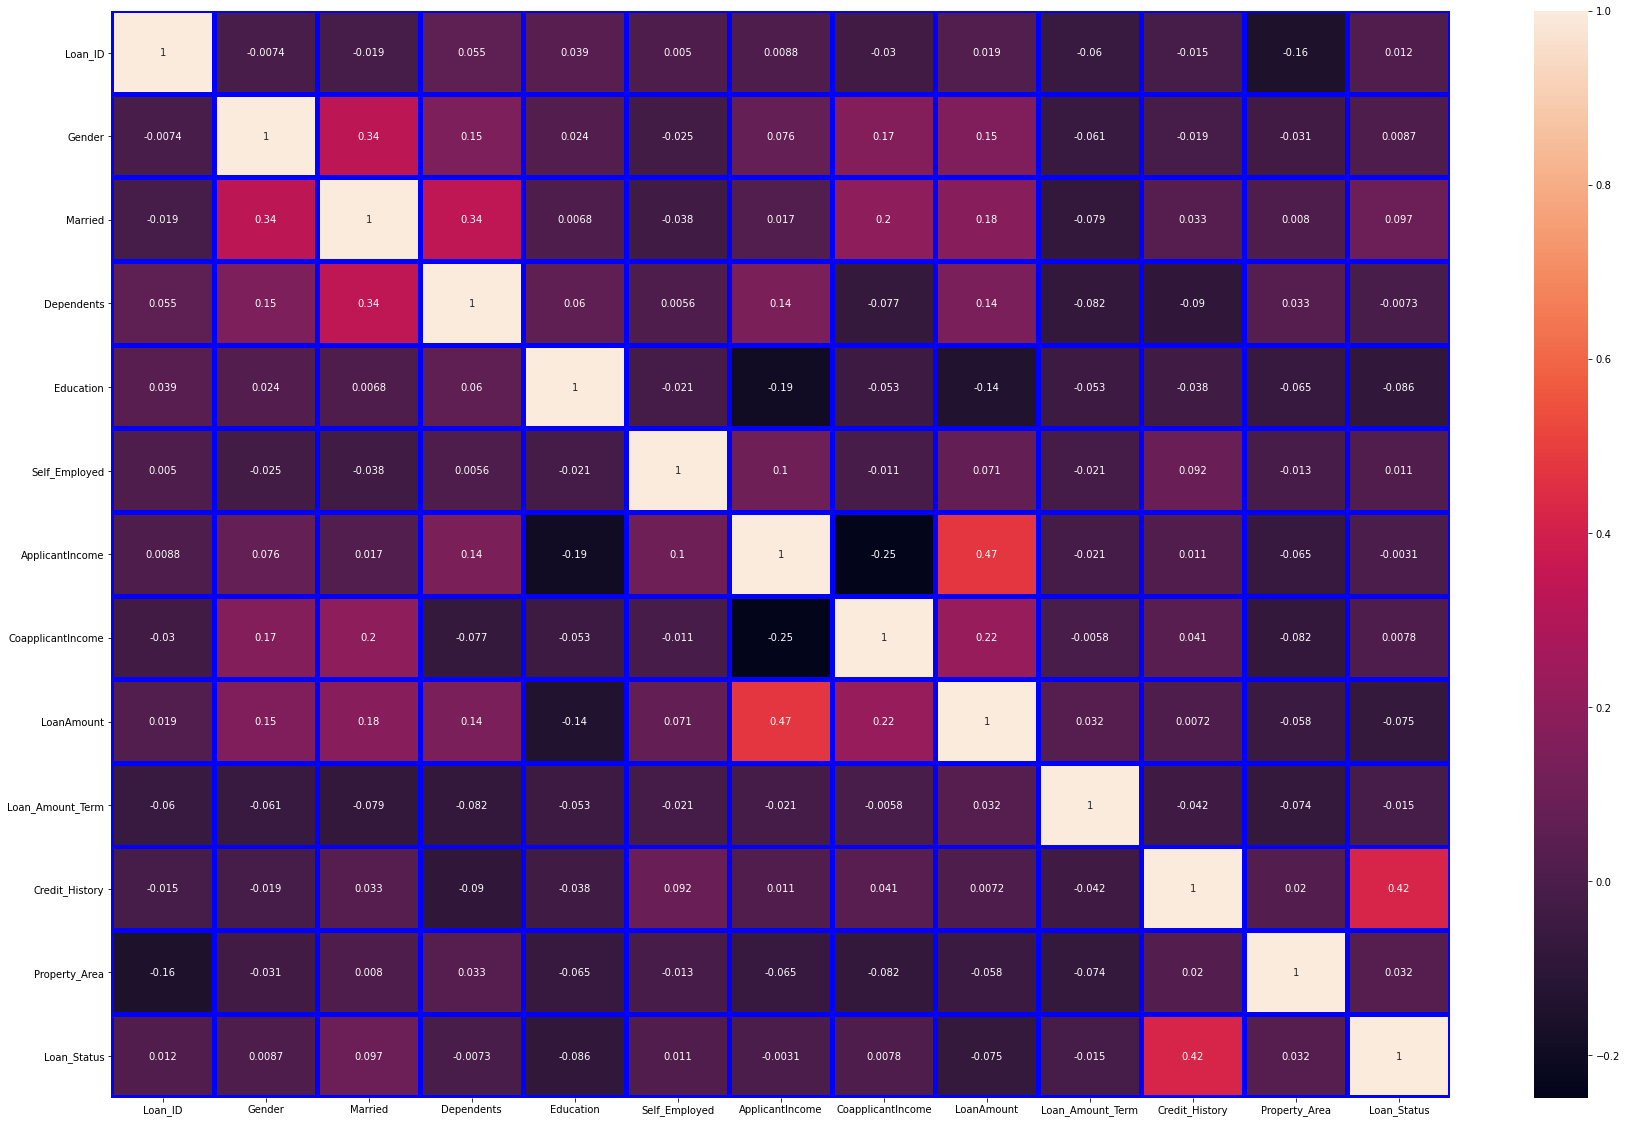

In [32]:
plt.figure(figsize=[30,20])
sns.heatmap(corr,annot=True,linewidths=4,linecolor='b')

Here not more variables are highly negatively correlated with loan status.

Loan_ID                 AxesSubplot(0.125,0.536818;0.0945122x0.343182)
Gender               AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
Married              AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
Dependents           AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
Education            AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
Self_Employed        AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
ApplicantIncome      AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
CoapplicantIncome          AxesSubplot(0.125,0.125;0.0945122x0.343182)
LoanAmount              AxesSubplot(0.238415,0.125;0.0945122x0.343182)
Loan_Amount_Term        AxesSubplot(0.351829,0.125;0.0945122x0.343182)
Credit_History          AxesSubplot(0.465244,0.125;0.0945122x0.343182)
Property_Area           AxesSubplot(0.578659,0.125;0.0945122x0.343182)
Loan_Status             AxesSubplot(0.692073,0.125;0.0945122x0.343182)
dtype: object

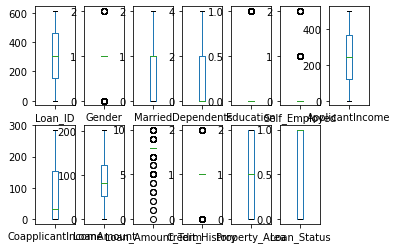

In [38]:
df.plot(kind="box",subplots=True,layout=(2,7))

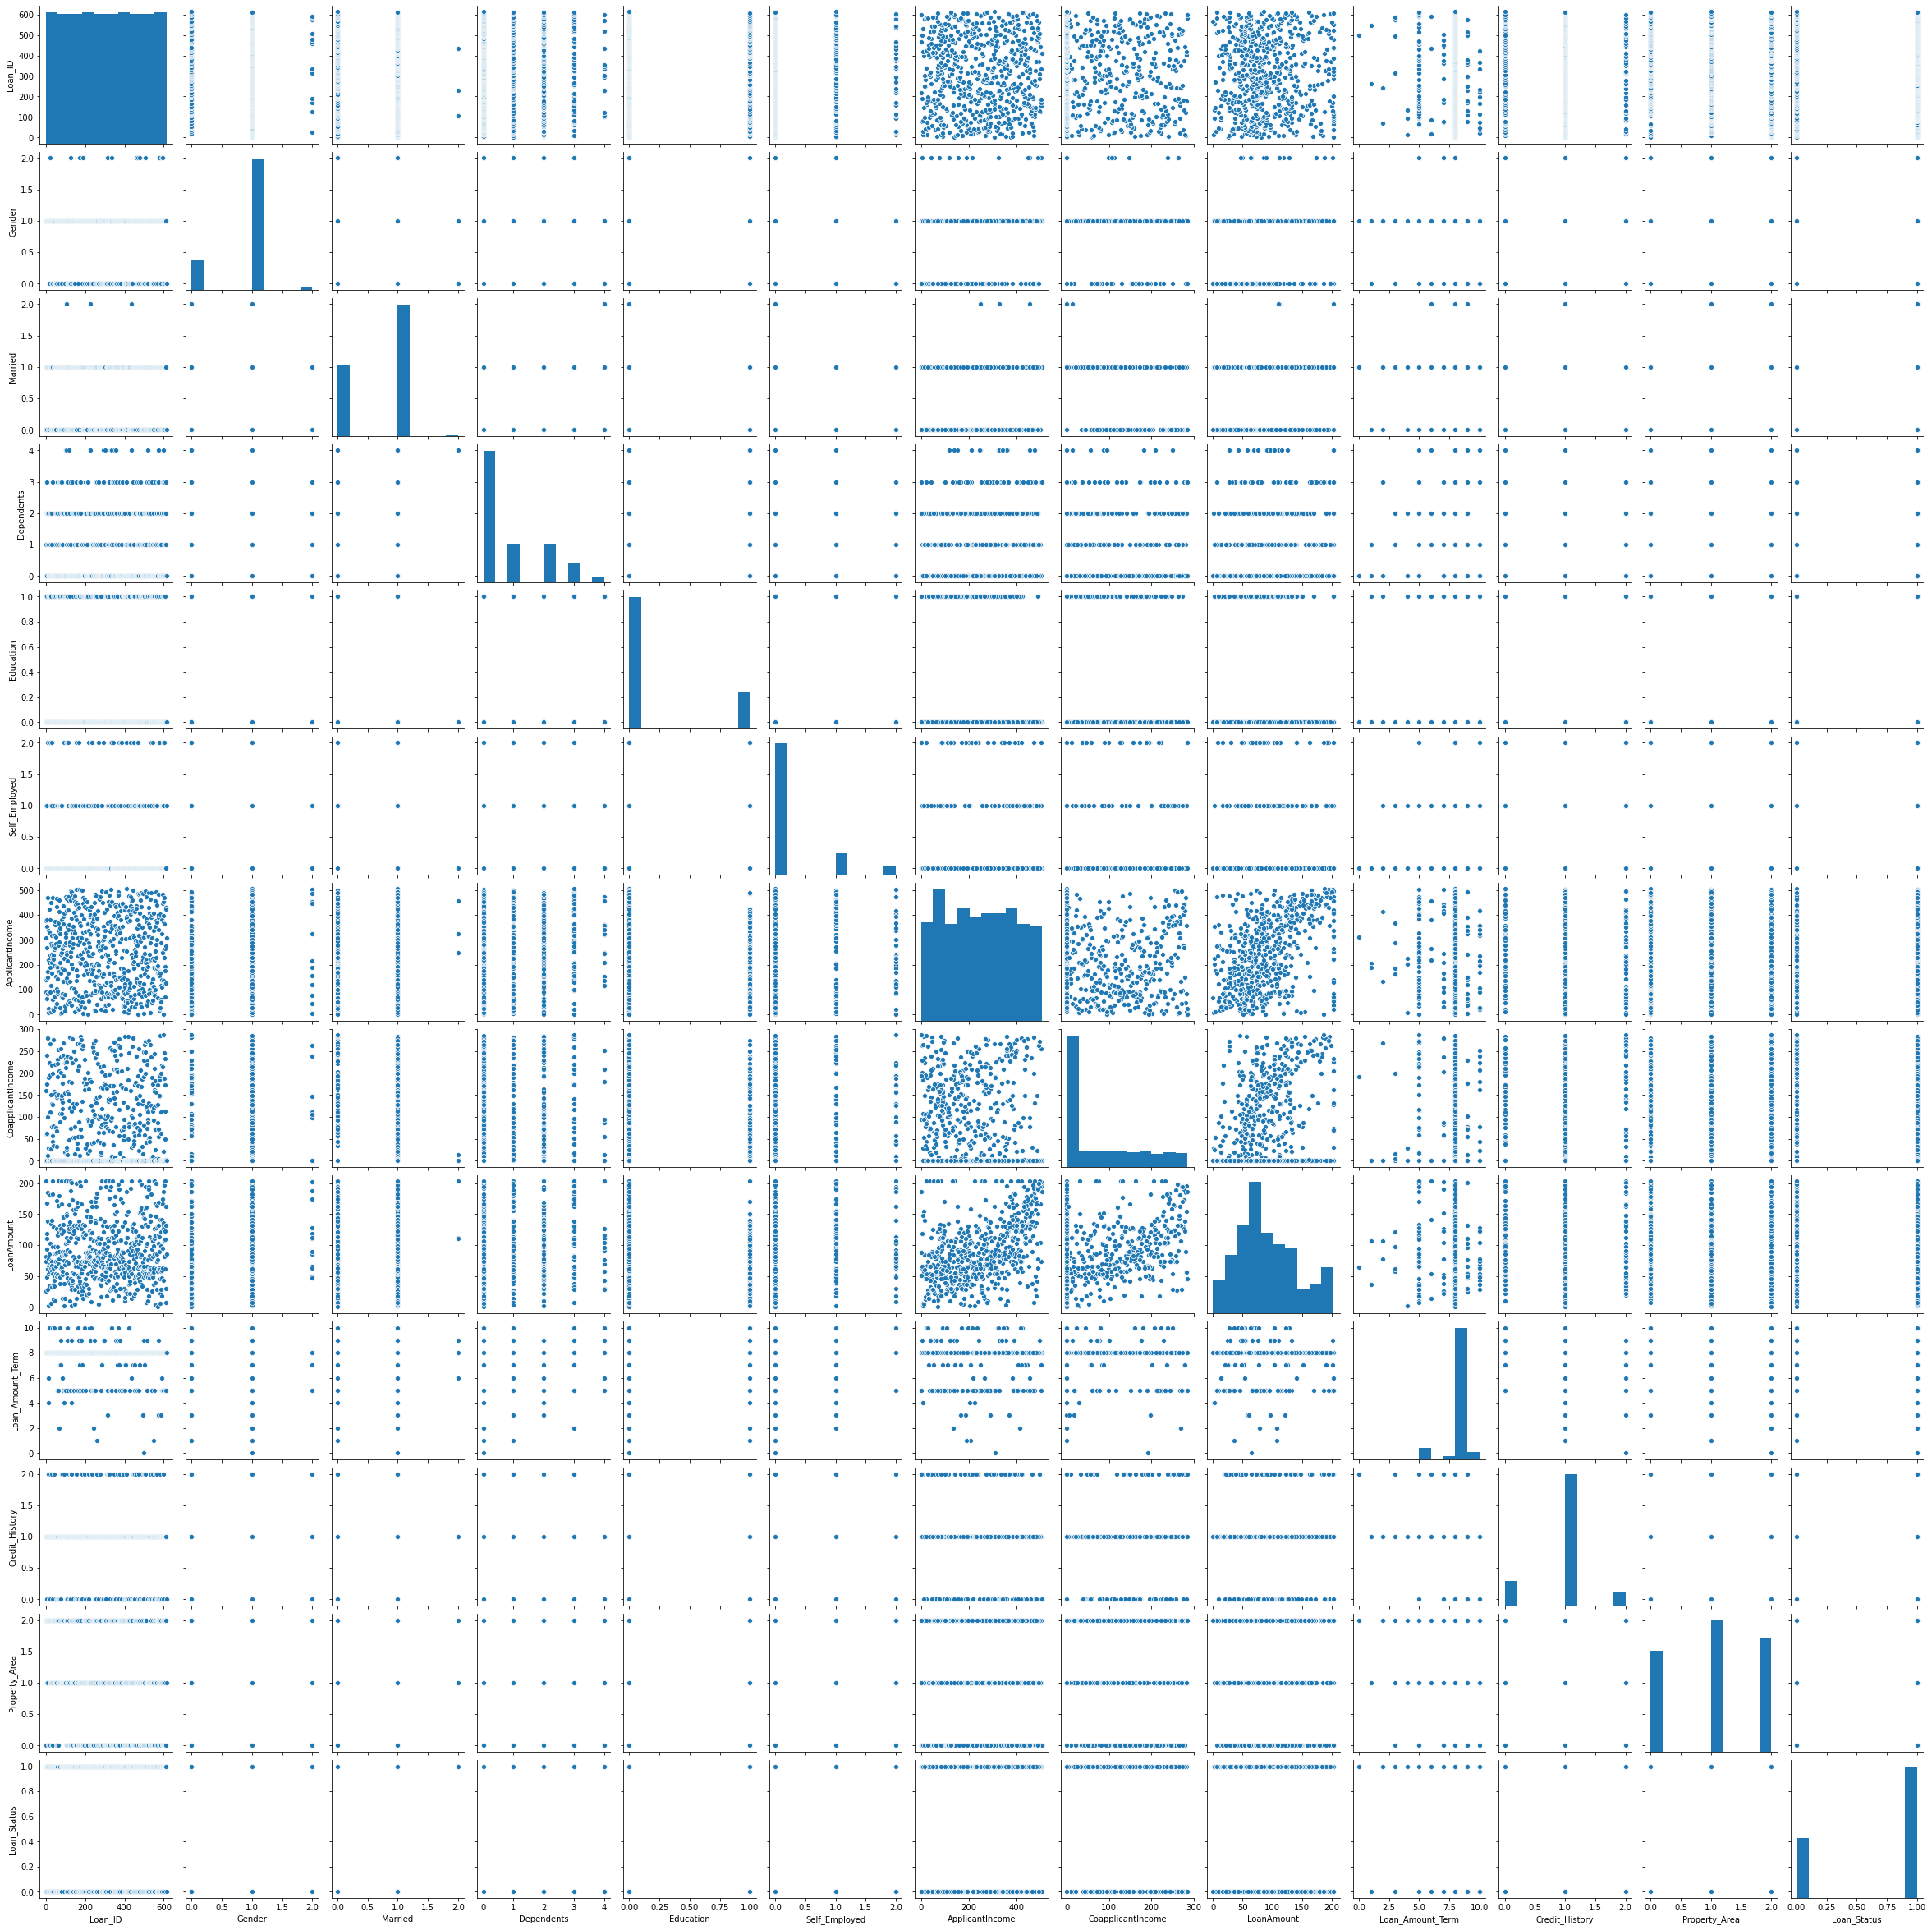

In [93]:
sns.pairplot(df)
plt.show()

### Outliers removal

In [39]:
from scipy.stats import zscore
z=np.abs(zscore(df))
new_df=df[(z<3).all(axis=1)]

In [40]:
new_df.skew()

Loan_ID             -0.000406
Gender              -0.929423
Married             -0.551771
Dependents           1.092855
Education            1.360380
Self_Employed        2.097433
ApplicantIncome      0.029038
CoapplicantIncome    0.786136
LoanAmount           0.549695
Loan_Amount_Term    -2.013253
Credit_History      -0.255123
Property_Area       -0.055634
Loan_Status         -0.794687
dtype: float64

There are skewness present in 'Gender','Married','Dependents','Education','Self_Employed','CoapplicantIncome','Loan_Amount_Term','Credit_History' not considering the skewness in the target . We will consider all skewness more than =/- 0.5

In [41]:
new_df.shape

(570, 13)

There were 614 columns by using zscore there are only 570 rows which means the data with outliers are removed.

In [43]:
from sklearn.preprocessing import power_transform

In [45]:
new_df[['Gender','Married','Dependents','Education','Self_Employed','CoapplicantIncome','Loan_Amount_Term','Credit_History']]=power_transform(new_df[['Gender','Married','Dependents','Education','Self_Employed','CoapplicantIncome','Loan_Amount_Term','Credit_History']])

In [46]:
new_df.skew()

Loan_ID             -0.000406
Gender               0.225547
Married             -0.300172
Dependents           0.380602
Education            1.360380
Self_Employed        2.097433
ApplicantIncome      0.029038
CoapplicantIncome   -0.040404
LoanAmount           0.549695
Loan_Amount_Term     0.588132
Credit_History       0.106869
Property_Area       -0.055634
Loan_Status         -0.794687
dtype: float64

### Splitting the data into x and y

In [48]:
x=df.drop(["Loan_Status"],axis=1)
y=df["Loan_Status"]

In [49]:
x.shape

(614, 12)

In [50]:
y.shape

(614,)

## Scaling

In [51]:
from sklearn.preprocessing import MinMaxScaler

sc=MinMaxScaler()
x=sc.fit_transform(x)

### Splitting the data for Training and Testing

In [57]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

## Model Building : Classification Problem

### Best Random State

In [58]:
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .31, random_state = i)
    modRF =  LogisticRegression()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc  = accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.8534031413612565 on random_state: 13


In [59]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .31, random_state = maxRS)

In [60]:
display(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(423, 12)

(423,)

(191, 12)

(191,)

### Logistic Regression

In [62]:
LR = LogisticRegression(fit_intercept = False, C = 1e9)
LR.fit(x_train,y_train)

LogisticRegression(C=1000000000.0, fit_intercept=False)

In [63]:
LR.fit(x_train,y_train)
LR_predicted=LR.predict(x_test)

print(accuracy_score(y_test,LR_predicted))
print(confusion_matrix(y_test,LR_predicted))
print(classification_report(y_test,LR_predicted))
print("Training accuracy::",LR.score(x_train,y_train))
print("Test accuracy::",LR.score(x_test,y_test))

0.8481675392670157
[[ 22  27]
 [  2 140]]
              precision    recall  f1-score   support

           0       0.92      0.45      0.60        49
           1       0.84      0.99      0.91       142

    accuracy                           0.85       191
   macro avg       0.88      0.72      0.75       191
weighted avg       0.86      0.85      0.83       191

Training accuracy:: 0.7919621749408984
Test accuracy:: 0.8481675392670157


Got the accuracy of 85%

### Decision Tree Classifier

In [64]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()

In [65]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.7172774869109948
              precision    recall  f1-score   support

           0       0.46      0.55      0.50        49
           1       0.83      0.77      0.80       142

    accuracy                           0.72       191
   macro avg       0.65      0.66      0.65       191
weighted avg       0.74      0.72      0.73       191



Got the accuracy of 72%

### KNeighbors Classifier

In [66]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(classification_report(y_test,predknn))

0.743455497382199
              precision    recall  f1-score   support

           0       0.50      0.27      0.35        49
           1       0.78      0.91      0.84       142

    accuracy                           0.74       191
   macro avg       0.64      0.59      0.59       191
weighted avg       0.71      0.74      0.71       191



Got the accuracy of 74%

### Random Forest Classifier

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [70]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc.score(x_train,y_train)
predrfc=rfc.predict(x_test)
print(accuracy_score(y_test,predrfc))
print(classification_report(y_test,predrfc))

0.8324607329842932
              precision    recall  f1-score   support

           0       0.77      0.49      0.60        49
           1       0.84      0.95      0.89       142

    accuracy                           0.83       191
   macro avg       0.81      0.72      0.75       191
weighted avg       0.83      0.83      0.82       191



Got the accuracy of 83%

### Support Vector Classifier

In [71]:
from sklearn.svm import SVC
svc=SVC(kernel='rbf')#It is a type of kernel we have aligned. Rbf is radial basis function.
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8481675392670157
              precision    recall  f1-score   support

           0       0.95      0.43      0.59        49
           1       0.83      0.99      0.91       142

    accuracy                           0.85       191
   macro avg       0.89      0.71      0.75       191
weighted avg       0.87      0.85      0.83       191



Got the accuracy of 85%

### Cross Validation

In [72]:
print(cross_val_score(dtc,x,y,cv=5).mean())

0.6839264294282287


In [73]:
print(cross_val_score(svc,x,y,cv=5).mean())

0.809462881514061


In [74]:
print(cross_val_score(rfc,x,y,cv=5).mean())

0.7931760629081701


In [75]:
print(cross_val_score(knn,x,y,cv=5).mean())

0.7182060509129682


## Ensemble Techniques

### Ada Boost Classifier

In [76]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [77]:
adb=AdaBoostClassifier()

In [78]:
adb.fit(x_train,y_train)
predicted_adb=adb.predict(x_test)
print(accuracy_score(y_test,predicted_adb))
print(confusion_matrix(y_test,predicted_adb))
print(classification_report(y_test,predicted_adb))
print("Training accuracy::",adb.score(x_train,y_train))
print("Test accuracy::",adb.score(x_test,y_test))

0.774869109947644
[[ 26  23]
 [ 20 122]]
              precision    recall  f1-score   support

           0       0.57      0.53      0.55        49
           1       0.84      0.86      0.85       142

    accuracy                           0.77       191
   macro avg       0.70      0.69      0.70       191
weighted avg       0.77      0.77      0.77       191

Training accuracy:: 0.8392434988179669
Test accuracy:: 0.774869109947644


Got the accuracy of 77%

### Bagging Classifier

In [79]:
bgc=BaggingClassifier()

In [80]:
bgc.fit(x_train,y_train)
predicted_bgc=bgc.predict(x_test)
print(accuracy_score(y_test,predicted_bgc))
print(confusion_matrix(y_test,predicted_bgc))
print(classification_report(y_test,predicted_bgc))
print("Training accuracy::",bgc.score(x_train,y_train))
print("Test accuracy::",bgc.score(x_test,y_test))

0.7015706806282722
[[ 25  24]
 [ 33 109]]
              precision    recall  f1-score   support

           0       0.43      0.51      0.47        49
           1       0.82      0.77      0.79       142

    accuracy                           0.70       191
   macro avg       0.63      0.64      0.63       191
weighted avg       0.72      0.70      0.71       191

Training accuracy:: 0.983451536643026
Test accuracy:: 0.7015706806282722


Got the accuracy of 70%

### Gradient Boosting Classifier

In [81]:
grbc=GradientBoostingClassifier()

In [82]:
grbc.fit(x_train,y_train)
predicted_grbc=grbc.predict(x_test)
print(accuracy_score(y_test,predicted_grbc))
print(confusion_matrix(y_test,predicted_grbc))
print(classification_report(y_test,predicted_grbc))
print("Training accuracy::",grbc.score(x_train,y_train))
print("Test accuracy::",grbc.score(x_test,y_test))

0.8219895287958116
[[ 24  25]
 [  9 133]]
              precision    recall  f1-score   support

           0       0.73      0.49      0.59        49
           1       0.84      0.94      0.89       142

    accuracy                           0.82       191
   macro avg       0.78      0.71      0.74       191
weighted avg       0.81      0.82      0.81       191

Training accuracy:: 0.9196217494089834
Test accuracy:: 0.8219895287958116


Got the accuracy of 82%

### Cross Validation Score

In [83]:
print(cross_val_score(adb,x,y,cv=5).mean())

0.6776089564174329


In [84]:
print(cross_val_score(bgc,x,y,cv=5).mean())

0.7361322137811542


In [85]:
print(cross_val_score(grbc,x,y,cv=5).mean())

0.7198987071837932


### Hyper Parameter Tuning

In [104]:
#LogisticRegressionClassifier
parameters = {'random_state':[3,4,6],
              'tol':[2.0, 3.0],
              'C':[4.0, 3.0],
              'intercept_scaling':[2.0, 3.0]}

In [105]:
GCV=GridSearchCV(LogisticRegression(),parameters,cv=5)

In [106]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [4.0, 3.0], 'intercept_scaling': [2.0, 3.0],
                         'random_state': [3, 4, 6], 'tol': [2.0, 3.0]})

In [107]:
#Printing the best parameter found by GridSearchCV
GCV.best_params_ 

{'C': 4.0, 'intercept_scaling': 2.0, 'random_state': 3, 'tol': 2.0}

In [108]:
mod=LogisticRegression(C=4.0,intercept_scaling=2.0,random_state=3,tol=3.0)
mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print(accuracy_score(y_test,pred)*100)

84.81675392670157


### Saving the model

In [109]:
import joblib
joblib.dump(mod, "LoanStatusPrediction.pkl")

['LoanStatusPrediction.pkl']